# 01 - Classification

La classification consiste à prédire la *classe* (ou la catégorie) d'une observation.

Par exemple :

- Dire si un transaction de carte de crédit est frauduleuse ou non (Classes possibles : Oui/Non)
- Dire dans quelle langue un texte est (Classes : Français, Anglais, Espagnol, ...)
- Indiquer le contenu d'une image (Classes : Chat, Chien, Chèvre, Cheval, ...)

On va commencer avec un exemple simple avant d'appliquer ça à quelque chose de plus compliqué :

- **Dire si une plante iris est de l'espèce *setosa*, *versicolor* ou *virginica***


## Un programme qui reconnaît des fleurs

J'ai trouvé deux nouvelles plantes iris, et j'aimerais savoir à quelle espèce elle appartient...

Voici les mesures que j'ai prises :

**Plante 1**

- `sepal_length` = 5.0cm
- `sepal_width` = 3.8cm
- `petal_length` = 1.6cm
- `petal_width` = 0.3cm

**Plante 2**

- `sepal_length` = 5.45cm
- `sepal_width` = 2.8cm
- `petal_length` = 4.5cm
- `petal_width` = 1.7cm


Essayons de deviner les espèces

In [ ]:
#@title Importation et lecture du dataframe
import pandas as pd
import numpy as np
import plotly.express as px

# Jeu de données un peu plus simple, on ne referra pas les étapes de supprimer les lignes vides/colonnes inutiles
iris = pd.read_csv("https://raw.githubusercontent.com/316k/misc-data/master/iris.csv")
display(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Jouer avec les données

On va se donner une intuition de ce qui se passe en jouant avec les données.


**QUESTION**

Pour ma première plante, j'ai `petal_width=0.3cm`.

Avec cette information seulement, pouvez-vous deviner l'espèce parmi *setosa*, *versicolor* et *virginica*?

Trouvez une façon de déterminer ça en affichant le tableau des données, ou encore avec un graphique

In [ ]:
#@title Exercice 1



**VOTRE RÉPONSE ICI**


**QUESTION**

Pour ma deuxième plante, j'ai plutôt : `petal_width=1.7cm`. Seulement en regardant cette information, arrivez-vous à dire quelle serait l'espèce?

Pour répondre à cette question, affichez la liste d'espèces de plantes, uniquement pour les lignes où `petal_width` est exactement de 1.7cm

In [ ]:
#@title Exercice 2



**VOTRE RÉPONSE ICI**


**QUESTION**

Si on considère plutôt `sepal_length=5.45cm` seulement, peut-on déterminer la sorte de plante?

Pour répondre, affichez les espèces des plantes dont le `sepal_length` est >= à 5.4cm et <=5.5cm

In [ ]:
#@title Exercice 3



**VOTRE RÉPONSE ICI**


## Utiliser plusieurs caractéristiques en même temps

**QUESTION**

Réfléchissez aux deux dernières réponses. Si on combine l'information des deux, donc si on regardait à la fois :

- `petal_width=1.7cm`
- `sepal_length=5.45cm`

Quelle serait l'espèce?

**VOTRE RÉPONSE ICI**


## Généraliser ça : quelle plante *ressemble le plus* à ma nouvelle plante?

Ce qu'on a fait jusqu'ici est : regarder, une caractéristique à la fois, quelles autres plantes connues ressemblaient le plus à notre nouvelle plante.

On devrait pouvoir faire ça sur les 4 caractéristiques en même temps.

&nbsp;

On peut considérer les caractéristiques d'une plante comme un *vecteur* à 4 dimensions :

$$\vec{\text{plante}} = (\text{sepal_length}, \text{sepal_width},\text{petal_length},\text{petal_width})$$

$$\vec{\text{plante}} = (5.45, 2.8, 4.5, 1.7)$$

On peut alors utiliser la notion de **distance entre deux vecteurs** et trouver l'autre plante la plus proche.

La distance euclidienne (ie, la formule de pythagore) peut être généralisée pour plusieurs dimensions :

$$\text{distance}(\vec{x}, \vec{y}) = \sqrt{(x_\text{sepal_length} - y_\text{sepal_length})^2 + \\ (x_\text{sepal_width} - y_\text{sepal_width})^2 + \\ (x_\text{petal_length} - y_\text{petal_length})^2 + \\(x_\text{petal_width} - y_\text{petal_width})^2}$$

**QUESTION**

Codez la fonction `distance_plantes(p1, p2)` qui prend en paramètres deux plantes et qui retourne la distance selon la formule ci-haut.

In [ ]:
#@title Exercice 4
# Méthode fournie pour créer une nouvelle ligne qui correspond à une plante
def creer_plante(sepal_length,sepal_width,petal_length,petal_width):
  return pd.Series(
      [sepal_length,sepal_width,petal_length,petal_width],
      index=['sepal_length','sepal_width','petal_length','petal_width']
  )

plante1 = iris.drop('species', axis='columns').loc[0] # 1ère plante du jeu de données
plante2 = creer_plante(5.45, 2.8, 4.5, 1.7) # Nouvelle plante
display(plante1)
display(plante2)

def distance_plantes(p1, p2):
  ...

######


#### tests
print("====")
print("Distance entre les deux plantes", distance_plantes(plante1, plante2))



**QUESTION**

Codez une fonction qui **crée un nouveau `DataFrame` basé sur une nouvelle plante à trouver**.

Votre méthode `ajouter_distance(df, nouvelle_plante)` doit retourner un nouveau `DataFrame` contenant la même chose que `df`, mais en ajoutant la nouvelle caractéristique `distance`, qui doit correspondre à la distance entre la plante et la `nouvelle_plante` fournie.

Réutilisez votre méthode `distance_plante()` codée au dernier numéro.

Le résultat devrait avoir l'air de :

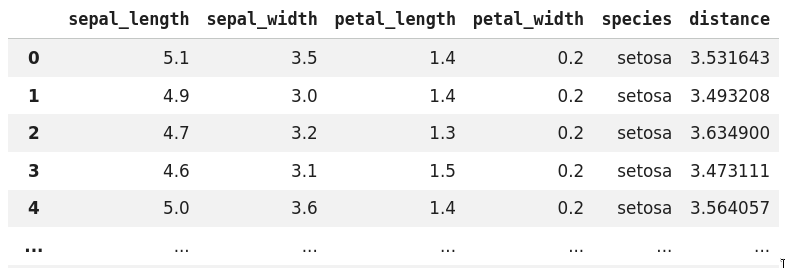

In [ ]:
#@title Exercice 5
def ajouter_distance(df, nouvelle_plante):
  ...

#####


#### tests
nouvelle_plante = creer_plante(5.45, 2.8, 4.5, 1.7)
df_iris_avec_distance = ajouter_distance(iris, nouvelle_plante)
display(df_iris_avec_distance)



**QUESTION**

On a maintenant une façon de trouver la plante *la plus similaire*, en considérant les 4 caractéristiques en même temps.

La plante **la** plus similaire serait celle dont la distance est la plus petite.

Utilisez le `DataFrame` construit au dernier numéro pour trouver la ligne la plus proche de notre nouvelle plante $(5.45,2.8,4.5,1.7)$

In [ ]:
#@title Exercice 6
nouvelle_plante = creer_plante(5.45, 2.8, 4.5, 1.7)
df_iris_avec_distance = ajouter_distance(iris, nouvelle_plante)

##########




On va mettre tout ça ensemble : complétez le code suivant pour avoir une fonction qui détecte la sorte de fleur pour une nouvelle observation

In [ ]:
#@title Exercice 7
def detecter_nouvelle_plante(dataframe, sepal_length, sepal_width, petal_length, petal_width):
  # Utilisez le dataframe iris
  nouvelle_plante = creer_plante(sepal_length, sepal_width, petal_length, petal_width)
  ...

######


#### tests
reponse1 = detecter_nouvelle_plante(iris, 5.45, 2.8, 4.5, 1.7)
print(reponse1)
reponse2 = detecter_nouvelle_plante(iris, 5.8,4.1,1.15,0.15)
print(reponse2)
# assert reponse1 == 'versicolor'
# assert reponse2 == 'setosa'



## Observations

Ce qu'on vient de réaliser dans les derniers exercices est un détecteur de plantes, **sans avoir à comprendre nous-mêmes la botanique**. Plutôt, **on se fie aux exemples**.

Si on modifie les exemples, l'algo peut détecter autre chose :

- Si ça avait été des tailles pour des espèces de patates, la logique serait restée la même.
- Si ça avait été des longueurs/largeurs de chats vs des longueurs/largeurs de chiens, notre démarche serait restée la même.

&nbsp;

On se rapproche doucement de ce qui caractérise l'apprentissage machine : on a un algorithme général, et le résultat est entièrement déterminé par les **données** qu'on possède.


# Algorithme KNN

L'algorithme que vous venez de coder est un cas spécial de l'algorithme **KNN** : les **K-Nearest Neighbors**, ou **K plus proches voisins**.

On peut le voir comme un algorithme d'apprentissage **supervisé**. On doit donc avoir des données **étiquettées**, ie, dont on connaît la classe à prédire. Dans notre cas, on avait bien des exemples de plantes dont on connaissait l'espèce.

&nbsp;

Dans les exercices plus haut, on a seulement considéré **la** plante la plus similaire. Cette méthode a le défaut d'être très sensible aux valeurs anormales. Inspectons ça :

**QUESTION**

J'ai une nouvelle plante avec comme mesures :

**Plante 3**

- `sepal_length=6.25`
- `sepal_width=2.7`
- `petal_length=4.95`
- `petal_width=1.4`

Selon la fonction que vous avez codée plus haut, quelle est son espèce?

In [ ]:
#@title Exercice 8



**QUESTION**

Regardez plutôt les **5 plantes les plus proches** de cette nouvelle plante, et dites ce qui ne va pas

In [ ]:
#@title Exercice 9



**VOTRE RÉPONSE ICI**


## Vote majoritaire

Plutôt que de toujours retourner **la** classe la plus proche, on peut utiliser un *vote majoritaire*.

On va plutôt regarder quelle espèce revient le plus souvent parmi les **K** observations les plus proches :

```python
['versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa']
=> Le vote est en faveur de 'versicolor'
```

Codez une fonction qui prend en paramètre un extrait de la colonne `species` (quelques lignes seulement) et qui retourne la valeur qui revient le plus souvent.

In [ ]:
#@title Exercice 10

def vote_majoritaire(choix):
  ...

###########


######## tests

exemple_especes1 = iris.loc[47:51].species
display(exemple_especes1)
print(vote_majoritaire(exemple_especes1)) # Ici, on devrait dire "setosa"

exemple_especes2 = iris.loc[99:103].species
display(exemple_especes2)
print(vote_majoritaire(exemple_especes2)) # Ici, on devrait dire "virginica"



**QUESTION**

Écrivez une nouvelle fonction `detecter_nouvelle_plante_v2` qui rajoute un paramètre `K`, pour décider combien de plantes proches devraient "voter" pour décider de la sorte de plante


In [ ]:
#@title Exercice 11

def detecter_nouvelle_plante_v2(dataframe, sepal_length, sepal_width, petal_length, petal_width, K):
  nouvelle_plante = creer_plante(sepal_length, sepal_width, petal_length, petal_width)
  ...

#######


#### tests
print("K=1:", detecter_nouvelle_plante_v2(iris, 6.25, 2.7, 4.95, 1.4, 1))
print("K=3:", detecter_nouvelle_plante_v2(iris, 6.25, 2.7, 4.95, 1.4, 3))
print("K=5:", detecter_nouvelle_plante_v2(iris, 6.25, 2.7, 4.95, 1.4, 5))
print("K=10:", detecter_nouvelle_plante_v2(iris, 6.25, 2.7, 4.95, 1.4, 10))




## Évaluation

On a une méthode pour deviner l'espèce d'une plante, mais est-ce qu'elle marche bien?

&nbsp;

L'**évaluation** est une étape clé en apprentissage machine.

On va utiliser nos données pour estimé la qualité de notre fonction `detecter_nouvelle_plante_v2`.

&nbsp;

On va **séparer nos données en deux `DataFrame`s**. On va avoir :

- 2/3 des données pour exécuter notre algorithme KNN
- 1/3 restant comme données de contrôle : on va utiliser ces données pour tester la qualité de notre algorithme

&nbsp;

En apprentissage machine, la terminologie est :

- **Les données d'entraînement** : la partie de nos données qu'on utilise dans l'algorithme lui-même
- **Les données de test** : une partie des données qu'on garde de côté

&nbsp;

On va commencer par mesurer **l'exactitude** (en anglais: **accuracy**) de notre algorithme KNN : quand on lui donne nos données de test, quelle proportion est correctement catégorisée?

**QUESTION**

Commencez par séparer les données en deux `DataFrame`s :

- `iris_entrainement`: doit contenir le premier 2/3 des observations mélangées
- `iris_test`: doit le dernier 1/3 des observations

In [ ]:
#@title Exercice 12

# Cette ligne permet d'obtenir un DataFrame avec les lignes mélangées au hasard
# La valeur `random_state` permet de forcer un certain "hasard" prédéterminé, qui
# sera toujours le même
iris_melange = iris.sample(frac=1, random_state=55)
display(iris_melange)

########




**QUESTION**

L'**exactitude** est le pourcentage de bonnes réponses que votre fonction arrive à donner.

Calculez ce chiffre en appelant `detecter_nouvelle_plante_v2(iris_entrainement, ...)` avec chaque plante contenue dans `iris_test`.

Comparez la prédiction faite par votre KNN avec avec la vraie réponse.

Affichez :

- Le nombre total de bonnes réponses
- Le pourcentage correspondant (divisez le nombre de bonnes réponses par le nombre de tests faits)

**Utilisez `K=3`.**

In [ ]:
#@title Exercice 13



**QUESTION**

Est-ce que ce nombre change si vous utilisez d'autres valeurs de `K`?

Testez :

- `K=1`
- `K=5`
- `K=10`
- `K=20`
- `K=80`

Utilisez une boucle pour éviter de recopier 5 fois le même code

In [ ]:
#@title Exercice 14
valeurs_de_k = [1, 5, 10, 20, 80]
#######




**QUESTION DE RÉFLEXION**

Si on utilisait `K=` la taille du dataframe `iris_entrainement` au complet, qu'est-ce qui se passerait?

In [ ]:
#@title Exercice 15
### Vous pouvez écrire du code ici au besoin pour vous aider dans votre réflexion



**VOTRE RÉPONSE ICI**


**QUESTION DE RÉFLEXION**

On a utilisé deux `DataFrame`s plutôt qu'un seul quand venait le temps de faire l'évaluation :

> On va **séparer nos données en deux `DataFrame`s**. On va avoir :
>
> - 2/3 des données pour exécuter notre algorithme KNN
> - 1/3 restant comme données de contrôle : on va utiliser ces données pour tester la qualité de notre algorithme

Pourquoi est-ce nécessaire?

Pourquoi ne peut-on pas simplement utiliser toutes les données dans le KNN, et toutes les données pour tester le KNN?

**VOTRE RÉPONSE ICI**


# 02 - Utilisation de `sklearn`

**`scikit-learn`** est une bibliothèque de fonctions qui regroupe un paquet d'outils pour l'apprentissage machine.

Elle offre entre autres un paquet d'algorithmes communs prêts à être utilisés, dans la mesure où on a un jeu de données préparé avec Numpy ou Pandas.

&nbsp;

Elle offre entres autres une implantation de l'algorithme KNN prête à être utilisée, nommée `KNeighborsClassifier`.

On va voir comment s'en servir pour appliquer cet algo à n'importe quel nouveau problème.

Les différents algorithmes disponibles dans `sklearn` doivent typiquement être importés séparément. Voici comment importer l'implantation de KNN disponible :

In [ ]:
#@title Importation
from sklearn.neighbors import KNeighborsClassifier

Tous les algorithmes qu'on va voir utilisent une interface similaire :

1. Créer un *modèle*
2. *Entraîner* le modèle avec `fit(X, y)`
3. Utiliser le modèle pour *prédire* des valeurs avec `predict()`, entres autres pour évaluer le résultat

Étape par étape :

1. **Créer un modèle**

In [ ]:
# 1. Créer un modèle
modele = KNeighborsClassifier(5) # KNN, avec K=5 choisi

2. **Entraînement**

C'est l'étape à laquelle le modèle reçoit des exemples de données sur lesquels baser ses prochaines prédictions.

La terminologie utilisée par `sklearn` est :

- `X` (x majuscule) : les exemples de données utilisés pour décider du résultat. Ici, ça serait un `DataFrame` qui contient les 4 caractéristiques dont on se sert pour deviner la classe : `sepal_length`, `sepal_width`, `petal_length`, `petal_width`
- `y` (y minuscule) : les exemples de ce qu'on souhaite prédire. Ici, ça serait la colonne du `DataFrame` qui correspond aux réponses : `species` seulement

Dans le cas de l'algorithme KNN, cet "entraînement" revient à "sauvegarder les données quelque part pour pouvoir les consulter plus tard", mais on verra des "entraînements" plus complexes dans les prochains chapitres.

In [ ]:
X_entrainement = iris_entrainement[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_entrainement = iris_entrainement['species']
modele.fit(X_entrainement, y_entrainement)

KNeighborsClassifier()

**3. Utilisation du modèle et évaluation**

Au moment d'utiliser le modèle, on devrait seulement lui donner des `X` (x majuscule, les caractéristiques qu'on connaît), et le modèle nous répond avec des nouveaux `y` prédits.

In [ ]:
# On sépare nos données de test en X/y
X_test = iris_test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_test = iris_test['species']

# Le résultat est un tableau Numpy avec les réponses données par le modèle
y_predictions = modele.predict(X_test)

display(y_predictions)

array(['setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa'], dtype=object)

Pour **l'évaluation** de la qualité des prédictions, on pourrait simplement comparer les prédictions `y_predictions` avec les valeurs connues :

In [ ]:
cases_egales = y_test == y_predictions

# Series qui contient des True/False pour dire si la prédiction est bonne ou pas
display(cases_egales.iloc[:5])

nb_vrais = cases_egales.sum() # Somme de valeurs True/False => nombre de cases à True
proportion_vrais = nb_vrais / len(y_test)
print("Nombre de bonnes réponses", nb_vrais)
print("Proportion de bonnes réponses", proportion_vrais)

,species
27,True
146,True
80,True
18,True
24,True


Nombre de bonnes réponses 49
Proportion de bonnes réponses 0.98


`sklearn` propose une fonction qui calcule tout ça et qui donne la proportion directement :

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predictions)) # 98% de précision, super!

0.98


## Tester l'algorithme KNN sur un autre jeu de données

Avec `sklearn`, on peut utiliser l'algorithme KNN très rapidement sur un jeu de données!

On change le `DataFrame` utilisé, et boum! C'est réglé.

&nbsp;

**Exercice** : Voici un nouveau problème : on veut deviner la *console de jeu* sur laquelle un jeu est sorti, à partir des informations suivantes :

- L'année de sortie (`Year`
- Le nombre de copies du jeu vendues pour l'Amérique du Nord (`NA_Sales`), l'Europe (`EU_Sales`), le Japon (`JP_Sales`), et ailleurs (`Other_Sales`)

Ces données ont été extraites du site web https://www.vgchartz.com/ et mises disponibles ici: https://www.kaggle.com/datasets/arslanali4343/sales-of-video-games

J'ai fait une passe de modifications dessus pour vous éviter de faire le nettoyage de zéro (retrait de colonnes inutiles, gestion des données mal entrées ou manquantes, etc)

&nbsp;

Suivez les étapes dans les commentaires, et inspirez-vous du code montré plus haut.

In [ ]:
# Voici le jeu de données :
df_jeux = pd.read_csv("https://raw.githubusercontent.com/316k/misc-data/master/vgsales-simple.csv", sep=',')

**QUESTION**

Avant de commencer, c'est bon de regarder les données qu'on a...
On va essayer de prédire la console de jeu à partir de l'année de sortie et
des chiffres de ventes.

Regardez le `DataFrame` et dites :
- Combien y a-t-il de jeux considérés au total?
- Combien y a-t-il de plateformes différentes?
- Quelle est l'année minimum et l'année maximum?
- Quel est le nombre de ventes Nord-Américaines minimum et maximum?
- Quelles sont les trois consoles de jeu qui reviennent le plus souvent dans le jeu de données?

In [ ]:
#@title Exercice 16.1



**VOTRE RÉPONSE ICI**


**QUESTION**

Affichez un histogramme de chaque colonne numérique ainsi qu'un diagramme circulaire des consoles pour avoir une idée de la répartition.

In [ ]:
#@title Exercice 16.2



In [ ]:
#@title Exercice 16.3

### Mélangez les lignes du DataFrame au hasard. Utilisez random_state=55
df_jeux_melange = ...

####

### Séparez le DataFrame en deux :
### 1. df_entrainement, qui contient 2/3 des lignes
### 2. df_test, qui contient le dernier 1/3 des lignes

### Affichez df_entrainement et df_test pour voir le résultat



In [ ]:
#@title Exercice 16.4
### Créez un modèle KNN nommé modele_jeux, avec une valeur de k = 5
modele_jeux = ...

########

### Séparez le DataFrame df_entrainement en :
### X_entrainement: toutes les caractéristiques, sauf le nom du jeu et sauf celle qu'on veut prédire
### y_entrainement: seulement la colonne qu'on veut prédire (la console de jeux)

### Faites l'entrainement KNN du modèle avec fit()

### Séparez le DataFrame df_test en deux de la même façon, X_test et y_test

### Demandez au modèle de faire KNN ses prédictions

### Calculez l'exactitude du modèle (l'accuracy) que vous avez obtenu



Si vous avez tout fait correctement, vous devriez terminer avec une exactitude de **≈ 32%**

## Évaluer un modèle selon son contexte

Le **32%** de bonnes réponses qu'on a obtenues ici ne doit pas être considéré dans l'absolu.

Ça serait une erreur de regarder 32% et de comparer ça à "Et si j'avais eu cette note dans un examen?"

Selon le contexte, 32% peut être plutôt bon.

&nbsp;

Si je vous disais que j'avais un algo qui prend en paramètre le *nom*
d'une personne et qui sait deviner la **couleur des yeux** avec **80%
d'exactitude**, est-ce que ça serait bon?

&nbsp;

Voici mon code :

```python
def couleur_des_yeux(nom):
  return "bruns"
```

Selon
[VisionDirect.fr](https://www.visiondirect.fr/blog/couleur-des-yeux)...

> *La couleur des yeux la plus courante est le marron, pour environ
> 80% de la population mondiale.*

Mon algorithme est exact 80% du temps...

&nbsp;

À l'inverse, si je vous disais que j'ai un algorithme capable de
prédire avec **95% d'exactitude** si une personne est rousse juste en
regardant son numéro de DA :

```python
def personne_est_rousse(numeroDA):
  ...
```

Est-ce que ça serait bon?

&nbsp;

Seulement 1 à 2% de la population est rousse... On pourrait avoir un score de 98% juste en disant toujours `faux`!

95%, ça serait très mauvais ici!

## Analyse du résultat

32% de bonnes réponses, c'est un peu décevant, mais on devrait remettre ça en perspective : on va comparer ça à deux algorithmes assez simples pour nous donner une meilleure idée de ce que 32% représente.

&nbsp;

On va comparer notre modèle avec deux méthodes stupides :

1. Dire des choses au hasard
2. Toujours dire la réponse la plus commune

**QUESTION**

Si on avait répondu au hasard à chaque prédiction, quelle aurait été l'exactitude (*accuracy*) de nos réponses?

Répétez l'expérience 10 fois :
- Créez un tableau `y_predictions_hasard` qui contient un nom de console au hasard parmi les consoles possibles
- Comparez avec les vraies réponses dans `y_test` via la fonction `accuracy_score`

In [ ]:
#@title Exercice 17.1



**VOTRE RÉPONSE ICI**


**QUESTION**

Si on utilisait une approche différente : si on répondait toujours avec la console sur laquel le plus de jeux sont sortis, quelle aurait été l'exactitude?

In [ ]:
#@title Exercice 17.2



**VOTRE RÉPONSE ICI**


Vous devriez voir que finalement, en comparant avec des méthodes simples, 32% de bonnes réponses ce n'est pas aussi mauvais que ça aurait pu l'être.

On sait au moins que notre `KNN` a appris *un petit quelque chose*.

## Améliorer les résultats

Est-ce qu'on peut faire mieux que 32%? Probablement...

Réfléchissons un peu au fonctionnement de l'algorithme.

La notion de **distance entre deux observations** est centrale dans l'algorithme KNN :

$$\text{distance}(\vec{x}, \vec{y}) = \sqrt{(x_\text{1} - y_\text{1})^2 + \\ (x_\text{2} - y_\text{2})^2 + \\ (x_\text{3} - y_\text{3})^2 + \\ ~~~~~~... \\ (x_\text{N} - y_\text{N})^2}$$

**Question** : quelle est la distance entre :

- Minecraft,WiiU,2016,180000.0,90000.0,140000.0,30000.0

- Tetris,GB,1989,23200000.0,2260000.0,4220000.0,580000.0


In [ ]:
#@title Exercice 18.1

minecraft = df_jeux.loc[1625]
tetris = df_jeux.loc[5]

display(minecraft)
display(tetris)

### Calculez la distance entre deux jeux avec la formule ci-haut
def distance(jeu1, jeu2):
  ...
########




Imaginons un nouveau jeu : Tetris 2, sorti sur Wii U

- Tetris 2,WiiU,**2015**,23200000.0,2260000.0,4220000.0,580000.0

La différence entre le vrai `Tetris` et notre `Tetris 2` imaginé est uniquement **l'année de sortie, en 2015**. On va imaginer que ce jeu est sorti sur *WiiU* (car il est sorti en 2015), mais qu'il a fait exactement les mêmes ventes que Tetris.

Affichez la distance entre `Tetris 2` et `Tetris`

In [ ]:
#@title Exercice 18.2

tetris = df_jeux.loc[5]
tetris2 = pd.Series(
    ["Tetris 2", "WiiU", 2015, 23200000.0, 2260000.0, 4220000.0, 580000.0],
    index=tetris.index
)
####




Imaginons encore un autre jeu : Minecraft 2, également sorti sur WiiU

- Minecraft 2,WiiU,2016,180000.0,90000.0,140000.0,300**30**.0

La seule différence entre le vrai `Minecraft` et notre `Minecraft 2` imaginé a été vendu à **seulement 30 exemplaires de plus** à travers le monde

Affichez la distance entre `Minecraft 2` et `Minecraft`

In [ ]:
#@title Exercice 18.3

minecraft = df_jeux.loc[1625]
minecraft2 = pd.Series(
    ["Minecraft 2", "WiiU", 2016, 180000.0, 90000.0, 140000.0, 30030.0],
    index=tetris.index
)
####




**QUESTION**

Regardez bien ces deux derniers résultats. Quelle est la distance la plus grande parmi:

- `Tetris` vs `Tetris 2` sorti 26 ans plus tard
- `Minecraft` vs `Minecraft 2` sorti la même année, mais vendu à 30 copies de plus

Est-ce que ce résultat fait du sens selon vous?

**VOTRE RÉPONSE ICI**


## Mise à l'échelle des données

Il y a quelque chose qui cloche dans ces derniers résultats.

Faire passer l'année de 1989 à 2015, ça augmente *moins* la distance que quand on change le nombre d'exemplaires de +30 sur un total de 44 millions de copies vendues.

Pourtant, si je vous demandais de m'estimer la console d'un jeu seulement en vous basant sur le fait que l'année de sortie est en 2015, il y a très peu de chances que vous vous mélangiez entre le Game Boy original des années 80 et la Wii U...

&nbsp;

KNN est très sensible à des données qui sont **sur des échelles différentes**.

Ici on a :

- L'année de sortie, comprise entre 1983 et 2016.
- Le nombre de copies vendues, entre 10 000 et 41.5 millions

De base, la fonction de distance est autant affectée par un +1 année que par +1 copie vendue, ce qui n'a pas de sens.

&nbsp;

Beaucoup d'algorithmes d'apprentissage machine présument que les données seront **mises à l'échelle**.

Une façon de régler ce problème est de transformer chaque colonne pour les remettre dans un même intervalle, par exemple :

- L'année de sortie, modifiée pour être entre 0% (=1983) et 100% (=2016)
- Le nombre de copies vendues, entre 0% (=valeur min) et (100%=valeur max)

Changer l'année de +26 ans aurait un impact de +79% dans la colonne de l'année mise à l'échelle.

Changer le nombre de ventes Nord-Américaines de +30 aurait un impact de 30/4 millions => à peu près 0%.

In [ ]:
display(X_entrainement.min())
display(X_entrainement.max())

,0
Year,1983.0
NA_Sales,10000.0
EU_Sales,10000.0
JP_Sales,10000.0
Other_Sales,10000.0


,0
Year,2016.0
NA_Sales,41490000.0
EU_Sales,29020000.0
JP_Sales,10220000.0
Other_Sales,10570000.0


## Code final avec les données ajustées

On peut utiliser la formule suivante sur chaque donnée, en utilisant le min et le max de sa colonne :

$$X = (X - min) / (max - min)$$

In [ ]:
# On modifie les données pour que tout soit dans un même intervalle
# Pandas va faire ça une colonne à la fois
X_entrainement_echelle = (X_entrainement - X_entrainement.min()) / (X_entrainement.max() - X_entrainement.min())
X_test_echelle = (X_test - X_entrainement.min()) / (X_entrainement.max() - X_entrainement.min())

modele_jeux_avec_echelle = KNeighborsClassifier(5)

modele_jeux_avec_echelle.fit(X_entrainement_echelle, y_entrainement)

y_predictions = modele_jeux_avec_echelle.predict(X_test_echelle)

print("Exactitude:", accuracy_score(y_test, y_predictions))

Exactitude: 0.5192837465564738


On arrive à **~52%** d'exactitude

Beaucoup mieux!

## Considérations finales

Rendu ici, une fois qu'on a une bonne idée de la performance de notre algorithme après les améliorations (52%), on pourrait recommencer un dernier entraînement sur toutes les données et utiliser cette version finale dans un vrai projet.

On saurait alors que notre modèle a une exactitude d'au-moins ≈52%, peut-être plus si on a de la chance et que le dernier tiers de données ajouté aide à reconnaître d'autres jeux.

### En résumé, ce qu'on a vu dans le chapitre

- **Tâche de Classification** : trouver à quelle catégorie appartient une certaine observation
- Notion de distance entre deux observations
- Algorithme KNN : trouver les K plus proches voisins de notre observation et les faire voter sur la classe
- Évaluer le résultat : séparer les données en deux
- Évaluer le résultat : **exactitude** d'un modèle
- Utiliser `sklearn` pour faire ça sur n'importe quel jeu de données
- Modifier les données avec une mise à l'échelle, c'est généralement essentiel pour avoir des bons résultats